## 1. `Importing Libraries📦`

In [61]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

import optuna
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.metrics import roc_curve, mean_absolute_error, root_mean_squared_error
from xgboost import XGBRegressor, XGBRFRegressor
from catboost import CatBoostRegressor

## 2. `Importing Dataset📂`

In [4]:
train_data = pd.read_csv('../data/train_data.csv')
test_data = pd.read_csv('../data/test_data.csv')

In [5]:
train_data.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,1,1,1,7.0,1,0,2,0,11.611723,112.15875
1,1,1,0,2,10.0,1,1,1,3,27.078537,68.88056
2,2,4,1,2,2.0,1,0,1,5,16.643760,39.17320
3,3,2,2,2,8.0,1,0,1,3,12.937220,80.60793
4,4,0,0,1,1.0,1,1,1,3,17.749338,86.02312


In [6]:
test_data.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg)
0,300000,3,1,2,2.0,0,0,2,3,20.671147
1,300001,2,0,1,7.0,0,1,0,3,13.564105
2,300002,0,0,0,9.0,0,1,1,1,11.809799
3,300003,0,2,0,1.0,1,0,1,3,18.477036
4,300004,0,2,0,2.0,1,1,2,0,9.907953


## 3. `DataSet Splittting`

In [62]:
X, Y = train_data.iloc[:, 1:-1], train_data.Price
test_X = test_data.iloc[:, 1:]

In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

#### Normalizing Numerical Cols

In [64]:
X.nunique()

Brand                         5
Material                      4
Size                          3
Compartments                 10
Laptop Compartment            2
Waterproof                    2
Style                         3
Color                         6
Weight Capacity (kg)    1920345
dtype: int64

In [9]:
train_X['Weight Capacity (kg)'] = StandardScaler().fit_transform(train_X[['Weight Capacity (kg)']])

## 4. `Model Training🤖`

2.7444056680144735


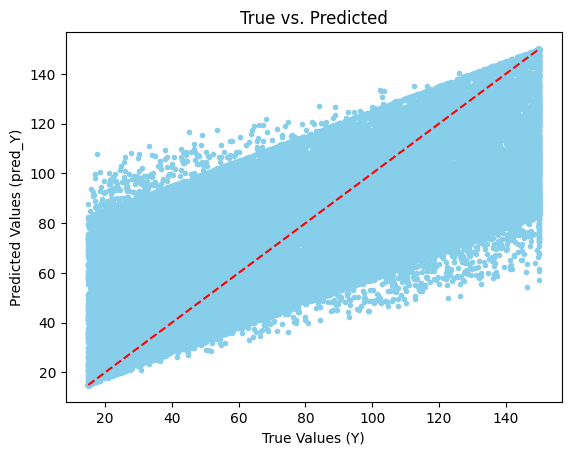

In [48]:
dtr = DecisionTreeRegressor()
dtr.fit(train_X, train_Y)
pred = dtr.predict(train_X)

print(root_mean_squared_error(train_Y, pred))

plt.scatter(train_Y, pred, marker = '.', color = 'skyblue')
plt.xlabel("True Values (Y)")
plt.ylabel("Predicted Values (pred_Y)")
plt.title("True vs. Predicted")
plt.plot([min(train_Y), max(train_Y)], [min(train_Y), max(train_Y)], color="red", linestyle="--")  # Ideal line
plt.show()

38.899748021379416


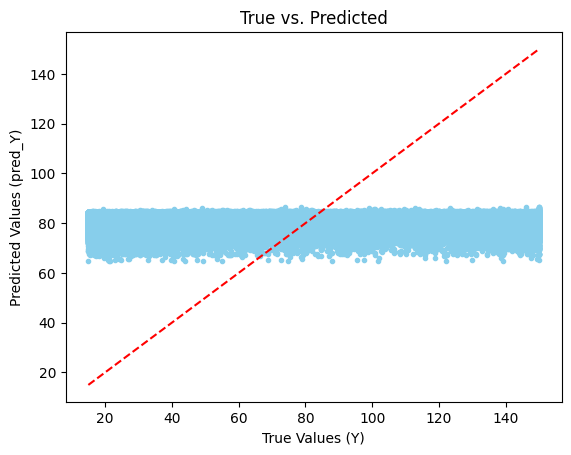

In [49]:
gbr = GradientBoostingRegressor()
gbr.fit(train_X, train_Y)
pred = gbr.predict(train_X)

print(root_mean_squared_error(train_Y, pred))

plt.scatter(train_Y, pred, marker = '.', color = 'skyblue')
plt.xlabel("True Values (Y)")
plt.ylabel("Predicted Values (pred_Y)")
plt.title("True vs. Predicted")
plt.plot([min(train_Y), max(train_Y)], [min(train_Y), max(train_Y)], color="red", linestyle="--")  # Ideal line
plt.show()

38.85135254721363


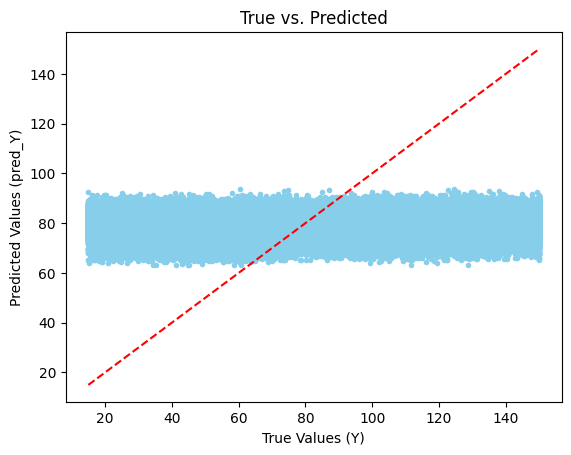

In [12]:
xgb = XGBRegressor()
xgb.fit(train_X, train_Y)
pred = xgb.predict(train_X)

print(root_mean_squared_error(train_Y, pred))

plt.scatter(train_Y, pred, marker = '.', color = 'skyblue')
plt.xlabel("True Values (Y)")
plt.ylabel("Predicted Values (pred_Y)")
plt.title("True vs. Predicted")
plt.plot([min(train_Y), max(train_Y)], [min(train_Y), max(train_Y)], color="red", linestyle="--")  # Ideal line
plt.show()

In [ ]:
cbr = CatBoostRegressor()
cbr.fit(train_X, train_Y)
pred = cbr.predict(train_X)

print(root_mean_squared_error(train_Y, pred))

plt.scatter(train_Y, pred, marker = '.', color = 'skyblue')
plt.xlabel("True Values (Y)")
plt.ylabel("Predicted Values (pred_Y)")
plt.title("True vs. Predicted")
plt.plot([min(train_Y), max(train_Y)], [min(train_Y), max(train_Y)], color="red", linestyle="--")  # Ideal line
plt.show()

38.93393421419968


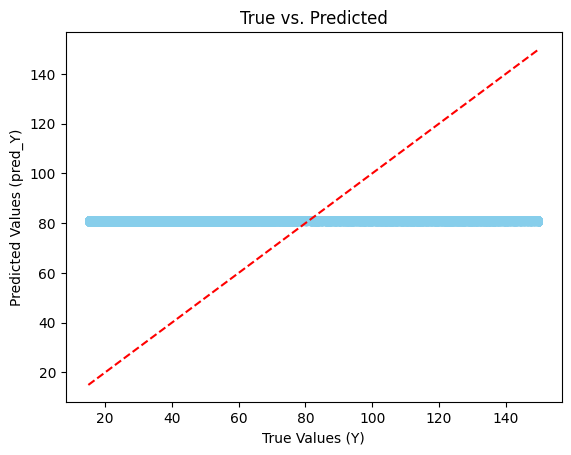

In [36]:
xgbrf = XGBRFRegressor(n_estimators=1000, learning_rate=0.1, max_depth=6, subsample=0.8, colsample_bynode=0.8, random_state=42)
xgbrf.fit(train_X, train_Y)
pred = xgbrf.predict(train_X)

print(root_mean_squared_error(train_Y, pred))

plt.scatter(train_Y, pred, marker = '.', color = 'skyblue')
plt.xlabel("True Values (Y)")
plt.ylabel("Predicted Values (pred_Y)")
plt.title("True vs. Predicted")
plt.plot([min(train_Y), max(train_Y)], [min(train_Y), max(train_Y)], color="red", linestyle="--")  # Ideal line
plt.show()

38.891373089141325
38.86144336299906


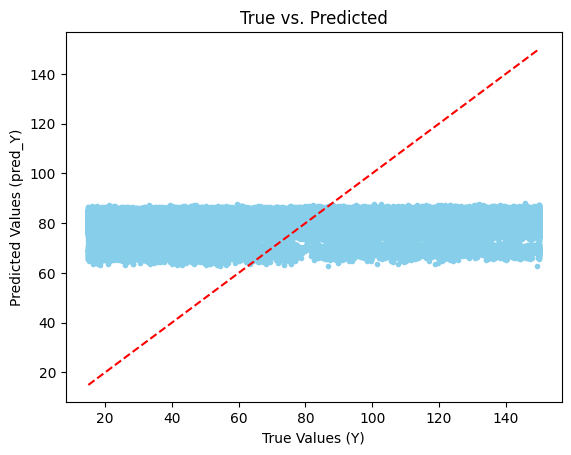

In [67]:
hgbr = HistGradientBoostingRegressor(max_iter=10000)
hgbr.fit(X_train, Y_train)
train_pred = hgbr.predict(X_train)
test_pred = hgbr.predict(X_test)
hgbr_train_score = root_mean_squared_error(Y_train, train_pred)
hgbr_test_score = root_mean_squared_error(Y_test, test_pred)
print(hgbr_train_score)
print(hgbr_test_score)

plt.scatter(train_Y, pred, marker = '.', color = 'skyblue')
plt.xlabel("True Values (Y)")
plt.ylabel("Predicted Values (pred_Y)")
plt.title("True vs. Predicted")
plt.plot([min(train_Y), max(train_Y)], [min(train_Y), max(train_Y)], color="red", linestyle="--")  # Ideal line
plt.show()

- the best model is HistGradientBoostingRegressor

## -> `HyperParameter Tuning`

In [68]:
def objective(trial):
    params = {
        "max_iter": trial.suggest_int("max_iter", 100, 1000, step=100),
        "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.2),
        "max_depth": trial.suggest_int("max_depth", 5, 25),
        "l2_regularization": trial.suggest_loguniform("l2_regularization", 1e-6, 1e-1),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 10, 100),
        "max_bins": trial.suggest_int("max_bins", 64, 255),
    }
    
    model = HistGradientBoostingRegressor(**params, random_state=42)
    model.fit(X_train, Y_train)
    
    preds = model.predict(X_test)
    return root_mean_squared_error(Y_test, preds)

In [69]:
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

[I 2025-02-12 20:09:28,245] A new study created in memory with name: no-name-f04d9fce-e73a-4e33-a83b-32139ba86eb3
[I 2025-02-12 20:10:25,165] Trial 0 finished with value: 38.86094205882324 and parameters: {'max_iter': 700, 'learning_rate': 0.01513415750710284, 'max_depth': 17, 'l2_regularization': 0.0007854020339493565, 'min_samples_leaf': 83, 'max_bins': 207}. Best is trial 0 with value: 38.86094205882324.
[I 2025-02-12 20:10:39,878] Trial 1 finished with value: 38.86218561568136 and parameters: {'max_iter': 300, 'learning_rate': 0.04954145815051656, 'max_depth': 23, 'l2_regularization': 0.0002378492008997474, 'min_samples_leaf': 91, 'max_bins': 226}. Best is trial 0 with value: 38.86094205882324.
[I 2025-02-12 20:11:31,103] Trial 2 finished with value: 38.86196281502922 and parameters: {'max_iter': 1000, 'learning_rate': 0.018127597692400334, 'max_depth': 15, 'l2_regularization': 0.08929299981403044, 'min_samples_leaf': 97, 'max_bins': 196}. Best is trial 0 with value: 38.86094205882

[I 2025-02-12 20:19:55,047] Trial 28 finished with value: 38.862101009144794 and parameters: {'max_iter': 400, 'learning_rate': 0.10753521908885179, 'max_depth': 11, 'l2_regularization': 0.027111999943950228, 'min_samples_leaf': 72, 'max_bins': 192}. Best is trial 24 with value: 38.8603771074671.
[I 2025-02-12 20:20:04,452] Trial 29 finished with value: 38.86178862153315 and parameters: {'max_iter': 100, 'learning_rate': 0.07975859704127064, 'max_depth': 18, 'l2_regularization': 0.00038007498112655857, 'min_samples_leaf': 84, 'max_bins': 150}. Best is trial 24 with value: 38.8603771074671.
[I 2025-02-12 20:20:21,894] Trial 30 finished with value: 38.86070300810425 and parameters: {'max_iter': 300, 'learning_rate': 0.05833445572661798, 'max_depth': 16, 'l2_regularization': 0.0010773202140382555, 'min_samples_leaf': 56, 'max_bins': 212}. Best is trial 24 with value: 38.8603771074671.
[I 2025-02-12 20:20:41,435] Trial 31 finished with value: 38.861718641150496 and parameters: {'max_iter':

In [70]:
best_params = study.best_params
print("Best Parameters:", best_params)

Best Parameters: {'max_iter': 200, 'learning_rate': 0.062357277482508675, 'max_depth': 17, 'l2_regularization': 0.00034257694285158796, 'min_samples_leaf': 77, 'max_bins': 216}


In [71]:
best_model = HistGradientBoostingRegressor(**best_params, random_state=42)
best_model.fit(train_X, train_Y)

HistGradientBoostingRegressor(l2_regularization=0.00034257694285158796,
                              learning_rate=0.062357277482508675, max_bins=216,
                              max_depth=17, max_iter=200, min_samples_leaf=77,
                              random_state=42)

## Saving submission

In [72]:
def saveSubmission(model, score, name):
    submission_pd = pd.DataFrame()
    pred = model.predict(test_X.iloc[:, :])
    submission_pd = pd.DataFrame({'id' : test_data['id'], 'Price' : pred})
    filename = f"../data/submissions/{str(name)}_submission_score_{score}_{datetime.now().strftime('%Y-%m-%d_%H-%M-%S')}.csv"
    submission_pd.to_csv(filename, index = False)

In [74]:
saveSubmission(best_model, root_mean_squared_error(Y_test, best_model.predict(X_test)), 'hgbr')